In [153]:
import numpy as np
import pickle
import json
from scipy import sparse
import os
import matplotlib.pyplot as plt

In [154]:
clustering_results_path = './sigma-girl-MIIRL/data_starcraft/results.pkl'
clustering_results = pickle.load(open(clustering_results_path, "rb"))

In [155]:
actions = pickle.load(open('./MSC/exported_replays/actions_TerranVsTerran_100_150_3.pkl', 'rb'))
states = pickle.load(open('./MSC/exported_replays/states_TerranVsTerran_100_150_[16:26].pkl', 'rb'))
rewards = pickle.load(open('./MSC/exported_replays/rewards_TerranVsTerran_100_150_[ 20  21 -22].pkl', 'rb'))

In [156]:
macro_action_space = ['Build', 'TrainWorker', 'TrainArmy', 'None']

terran_stat = json.load(open('./MSC/parsed_replays/Stat/Terran.json'))
id_reversed = {value: key for (key, value) in terran_stat['action_id'].items()}

In [157]:
dir_path = './MSC/parsed_replays/GlobalFeatureVector/Terran_vs_Terran/Terran'
num_replays = 100
paths = os.listdir(dir_path)
raw_data = {}
for i in range(num_replays):
    index = str(i)
    data = np.asarray(sparse.load_npz(os.path.join(dir_path,paths[i])).todense())
    raw_data[index] = data

In [163]:
num_clusters =  len(clustering_results[0][0])
num_clusters
cluster_names = ["cluster " + str(i) for i in range(num_clusters)]

In [164]:
# get cluster assignments
cluster_assignments = [0] * num_replays
for i in range(num_replays):
    cluster_probs = clustering_results[0][0][:, i]
    cluster_assignments[i] = np.argmax(cluster_probs)

In [160]:
# testing
cluster_assignments

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

In [162]:
# compute cluster win/loss distributions
outcome_distributions = [[] for i in range(num_clusters)]
overall_distribution = []
for i in range(num_replays):
    index = str(i)
    outcome = str(raw_data[index][0][0])
    overall_distribution.append(outcome)
    outcome_distributions[cluster_assignments[i]].append(outcome)

IndexError: list index out of range

Text(0.5, 1.0, 'Win/Loss Histogram')

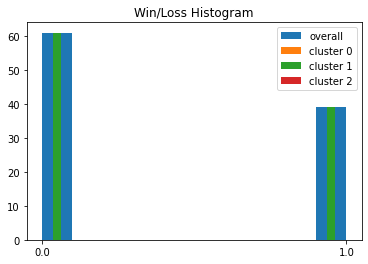

In [143]:
# visualize distributions
fig, ax = plt.subplots()
ax.hist(overall_distribution, label='overall')
ax.hist(outcome_distributions, label=cluster_names)
ax.legend()
ax.set_title("Win/Loss Histogram")